In [1]:
from matplotlib import pyplot as plt
from processing_data import *

#### Data Visualizations for Sepsis ML Modeling Project

The main challenge of this dataset was the sparse nature. To better illustrate this, I have prepared histograms to show the count of non-NaN entries per row after various levels of processing. For these examples, I have used training data and a sample cutoff threshold of 10,000 such that columns with fewer than 10,000 non-NaN values will be removed.

In [2]:
sepsis_data_intake = initial_intake_process_of_data(data_type='train',load_tables='no')
data_dict, factors = sepsis_data_intake.process_data()

Adding UIDs.
UIDs added
Beginning processing for person_demographics_episode_train.
Finished processing of person_demographics_episode_train.
Beginning processing for measurement_meds_train.
Finished processing of measurement_meds_train.
Beginning processing for drugsexposure_train.


100%|██████████| 27594/27594 [07:29<00:00, 61.35it/s] 


Finished processing of drugsexposure_train.
Beginning processing for measurement_lab_train.
Finished processing of measurement_lab_train.
Beginning processing for proceduresoccurrences_train.
Finished processing of proceduresoccurrences_train.
Beginning processing for observation_train.
Finished processing of observation_train.
Beginning processing for measurement_observation_train.
Finished processing of measurement_observation_train.
Beginning processing for devices_train.
Finished processing of devices_train.
Beginning processing for SepsisLabel_train.
Finished processing of SepsisLabel_train.


For the first histogram, this is after only basic processing. At this point there are 109 columns in the dataframe.

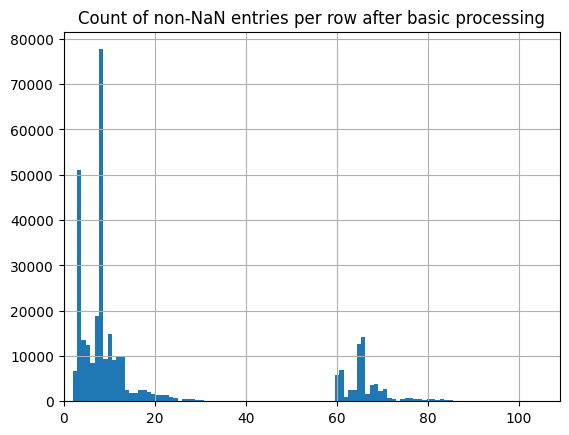

In [6]:
factors.count(axis=1).hist(bins = 100)
plt.title(label='Count of non-NaN entries per row after basic processing');
plt.xlim(0,109);

In [7]:
sepsis_data_processing = post_merge_process(data_dict=data_dict,factors=factors,data_type='train')
sepsis_data_processing.post_join_processing_train(10000)

Beginning adding new_person_id column based on uids.
Finished adding new_person_id column based on uids.
Beginning birthday ubiquity.
Birthday ubiquity established.
Adding visit reason


100%|██████████| 331623/331623 [12:55<00:00, 427.67it/s]


Visit reasons added
Clearing columns.
Columns cleared.
filling NaN values using Gaussians.
filled NaN values using Gaussians.
Filling zero values for one hot encoding columns.
Zeros filled.
Beginning categorical encoding.


100%|██████████| 3/3 [00:01<00:00,  1.53it/s]

Finished categorical encoding.


After further processing, there are 95 columns. One can note that the minimum number of columns with values per row has increased dramatically. This is primarily due to filling the NaN values as zero for all one-hot-encoded columns, such as drug exposures, devies, etc. (approximately 50 columns relate to drug exposure alone). In addition, age has been calculated in months for each instance for each patient, and some columns have had values imputed from gaussian distributions, which accounts for the majority of other columns gaining values.

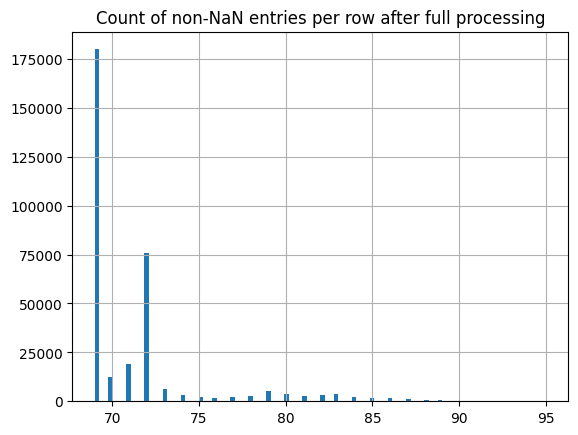

In [8]:
sepsis_data_processing.factors.count(axis=1).hist(bins = 100)
plt.title(label='Count of non-NaN entries per row after full processing');